In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Superstore Sales Dataset.csv')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
data.shape

(9800, 18)

In [ ]:
data['Customer ID'].nunique()

793

In [ ]:
data = data[['Customer ID', 'Order Date', 'Sales']]
data.head()

,Customer ID,Order Date,Sales
0,CG-12520,08/11/2017,261.9600
1,CG-12520,08/11/2017,731.9400
2,DV-13045,12/06/2017,14.6200
3,SO-20335,11/10/2016,957.5775
4,SO-20335,11/10/2016,22.3680


In [ ]:
data['Order Date'].astype

<bound method NDFrame.astype of 0       08/11/2017
1       08/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order Date, Length: 9800, dtype: object>

In [ ]:
# приведем признак 'Order Date' к формату даты
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Date'].head()

0   2017-08-11
1   2017-08-11
2   2017-12-06
3   2016-11-10
4   2016-11-10
Name: Order Date, dtype: datetime64[ns]

In [ ]:
# оставим только год и месяц
data['Order Date'] = data['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
# добавим признак 'First order' дату первого заказа клиента
data.set_index('Customer ID', inplace=True)
data['First order'] = data.groupby(level=0)['Order Date'].min()
data.reset_index(inplace=True)
data.insert(len(data.columns), 'Total orders', 0, allow_duplicates=False)
data.head()

,Customer ID,Order Date,Sales,First order,Total orders
0,CG-12520,2017-08,261.9600,2016-10,0
1,CG-12520,2017-08,731.9400,2016-10,0
2,DV-13045,2017-12,14.6200,2017-09,0
3,SO-20335,2016-11,957.5775,2016-04,0
4,SO-20335,2016-11,22.3680,2016-04,0


In [ ]:
cohorts = data.groupby(['First order', 'Order Date']).agg({'Customer ID': pd.Series.nunique,
'Total orders': pd.Series.count, 'Sales': np.sum})
cohorts.rename(columns={'Customer ID': 'Number of users'}, inplace=True)
cohorts.tail()

,,Number of users,Total orders,Sales
First order,Order Date,,,
2018-05,2018-11,1,5,409.548
2018-06,2018-06,1,2,98.350
2018-08,2018-08,1,4,1058.108
2018-09,2018-09,1,4,1038.260
2018-10,2018-10,3,5,1610.267


In [ ]:
def cohort_period(data):
    data['CohortPeriod'] = np.arange(len(data)) + 1
    return data

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(10)

Number of users  Total orders      Sales  CohortPeriod
First order Order Date                                                        
2015-01     2015-01                  54           126  28828.254             1
            2015-02                   2             4    663.646             2
            2015-03                   6            13    929.972             3
            2015-04                   1             4    697.074             4
            2015-05                   6            10   2225.342             5
            2015-06                   8            16   3456.928             6
            2015-07                   9            13   2752.554             7
            2015-08                   6             9   1069.170             8
            2015-09                   6            18   4608.922             9
            2015-10                   2             4    391.146            10

In [ ]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortPeriod', 'First order'], inplace=True)
cohort_group_size = cohorts['Number of users'].groupby(level=1).first()
cohort_group_size.head()

First order
2015-01    54
2015-02    44
2015-03    65
2015-04    44
2015-05    61
Name: Number of users, dtype: int64

In [ ]:
cohorts['Number of users'].unstack(1).head(15)


First order,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-10,2017-11,2017-12,2018-01,2018-03,2018-05,2018-06,2018-08,2018-09,2018-10
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,54.0,44.0,65.0,44.0,61.0,48.0,39.0,46.0,52.0,40.0,...,2.0,6.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0
2,2.0,5.0,8.0,3.0,4.0,4.0,1.0,9.0,3.0,6.0,...,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,6.0,6.0,2.0,1.0,5.0,1.0,8.0,2.0,4.0,6.0,...,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,3.0,1.0,2.0,7.0,5.0,1.0,7.0,5.0,1.0,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,6.0,4.0,5.0,4.0,5.0,2.0,5.0,5.0,6.0,3.0,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,8.0,4.0,2.0,6.0,2.0,8.0,6.0,4.0,3.0,4.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.0,1.0,6.0,4.0,11.0,6.0,4.0,4.0,7.0,3.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6.0,5.0,1.0,8.0,9.0,1.0,6.0,3.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6.0,4.0,9.0,7.0,2.0,3.0,3.0,2.0,4.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['First order', 'CohortPeriod'], inplace=True)
cohort_group_size = cohorts['Number of users'].groupby(level=0).first()
cohorts['Number of users'].unstack(0)
user_retention = cohorts['Number of users'].unstack(0).divide(cohort_group_size, axis=1)

<Axes: title={'center': 'Cohorts: User Retention'}, xlabel='CohortPeriod', ylabel='First order'>

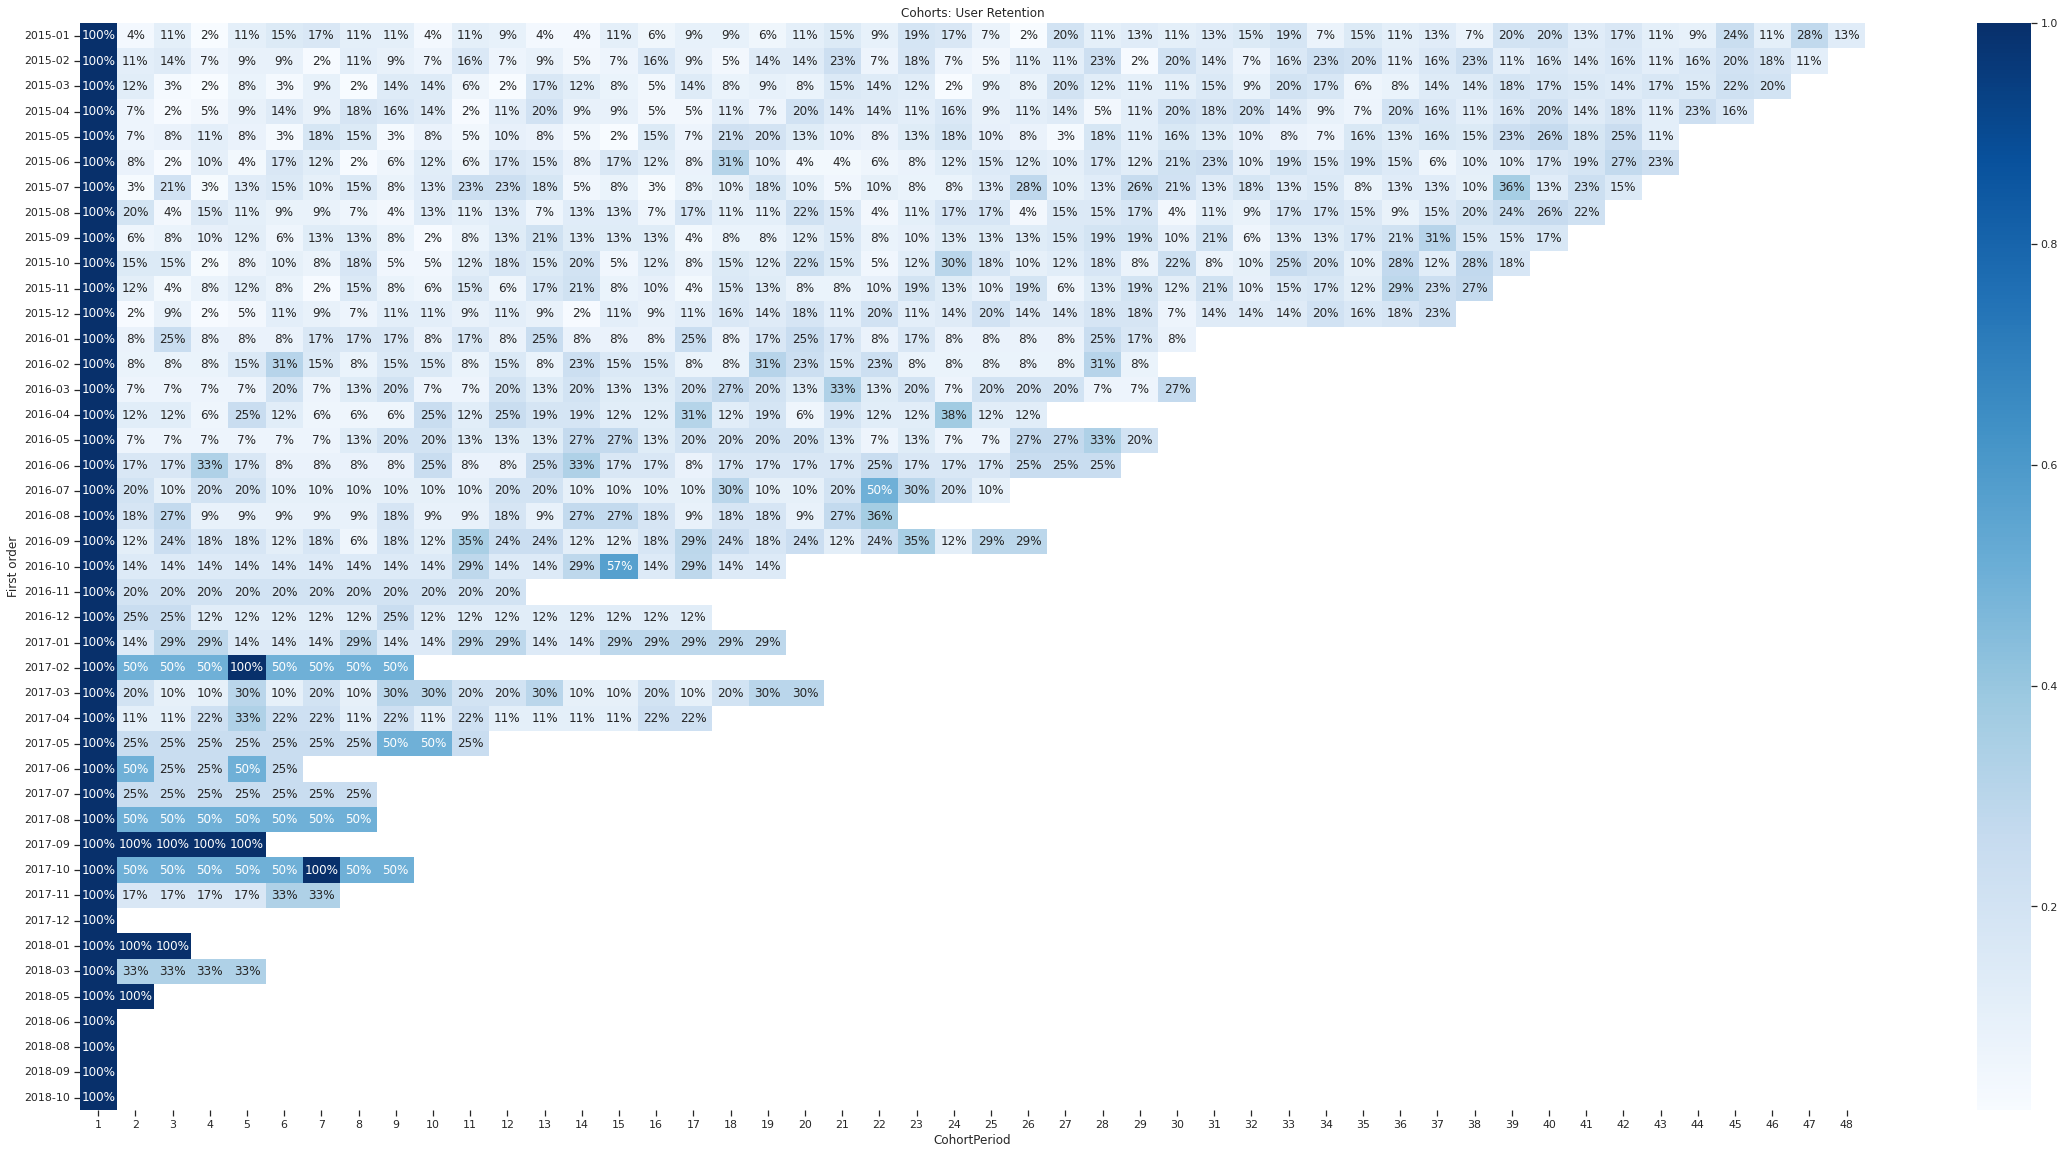

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(40, 20))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', cmap='Blues')

### Исходя из построенной тепловой карты можно сделать следующие выводы:

1)	В большинстве случаев Retention rate значительно падает уже на второй месяц после первой даты заказа, что говорит о том, что клиенты совершают покупки нерегулярно. Следовательно, есть смысл делать акцент рекламной кампании на новых клиентов.

2)	Во второй половине отчетного периода Retention rate сохраняет стабильные показатели вплоть до 12 месяца после совершения первой покупки. Приведенные данные можно использовать как оценку эффективности проведенных маркетинговых активностей, повлиявшие на удержание клиентов.

3)	Интересными являются когорты 2017–02, 2017–8, 2017–10, сохраняющие Retention rate на уровне 50%. Стоит обратить внимание на клиентов, которые совершали покупки в данные периоды и предложить им особые условия для их дальнейшего удержания.

4)	Стоит разобрать отдельные случаи повышенного показателя, например на 21 месяц для 2016–07 или на 14 месяц для 2016–10, чтобы разобраться, чем мотивирован такой скачок.
